<h2>Name : Konyala Anish Reddy</h2>
<h2>Roll No : 2021BCS0099</h2>

<h2><u>Handwritten Digit Recognition using Support Vector Machines</u></h2>


In this project, we'll use Support Vector Machines (SVM) to recognize
handwritten digits. We'll use the famous MNIST dataset which contains 70,000 images of
handwritten digits (0-9) and build a model that can correctly identify the digit in the image.

In [1]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

1. Data Collection: Download the MNIST dataset which contains 70,000 images of
handwritten digits. The dataset is available in different formats like CSV, JSON, etc.
Choose a format that is compatible with the programming language you'll be using. For
example, if you'll be using Python, you can download the dataset in CSV format.

In [2]:
#import file and reading few lines
train_data = pd.read_csv('mnist_train.csv')
train_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#import file and reading few lines
test_data = pd.read_csv('mnist_test.csv')
test_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Viewing the Shape of the dataset
train_data.shape

(60000, 785)

In [11]:
test_data.shape

(10000, 785)

In [12]:
#Getting info about the dataset
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [13]:
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Checking for missing values in the dataset
pd.set_option('display.max_rows', 50)
train_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [9]:
pd.set_option('display.max_rows', 50)
test_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [16]:
# let us check unique entries of label column
np.unique(train_data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [17]:
#Checking total number of samples associated with each label
train_data['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [18]:
test_data['label'].value_counts()

label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

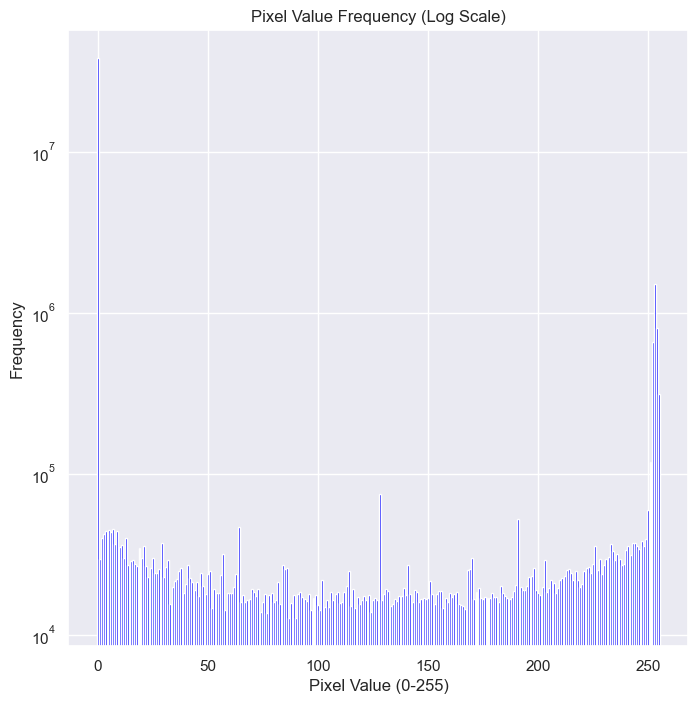

In [19]:
# Checking the frequency of each pixel value in the dataset
y = pd.value_counts(train_data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<Axes: xlabel='label', ylabel='25x25'>

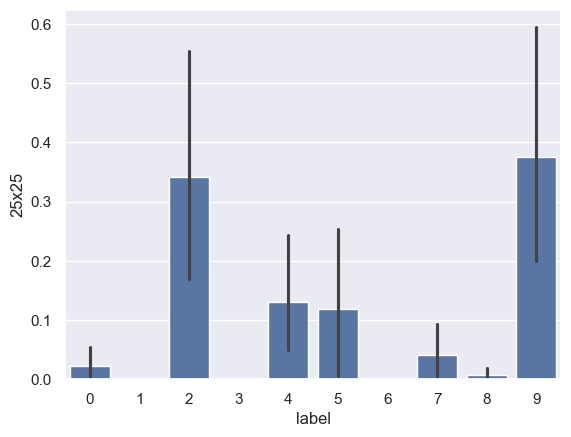

In [20]:
#Checking how many samples of each label are present in a paticular pixel
sns.barplot(x='label', y='25x25', data=train_data)

<Axes: xlabel='label', ylabel='15x15'>

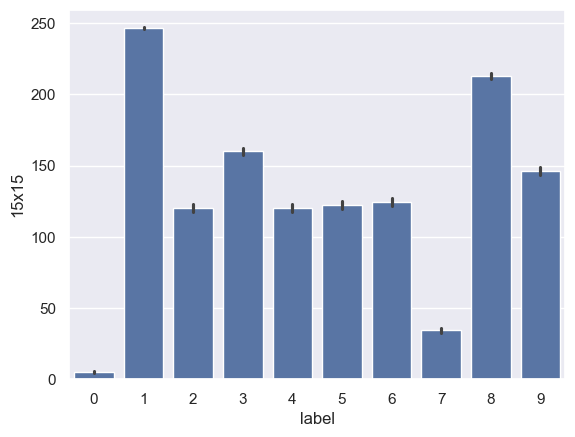

In [21]:
sns.barplot(x='label', y='15x15', data=train_data)

Text(0.5, 1.0, 'Digit 5')

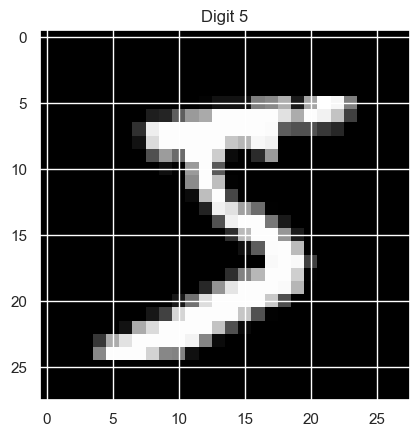

In [22]:
#Visualzing few digits
five = train_data.iloc[0, 1:]
five.shape
five = five.values.reshape(28,28)
plt.imshow(five, cmap='gray')
plt.title("Digit 5")

Text(0.5, 1.0, 'Digit 0')

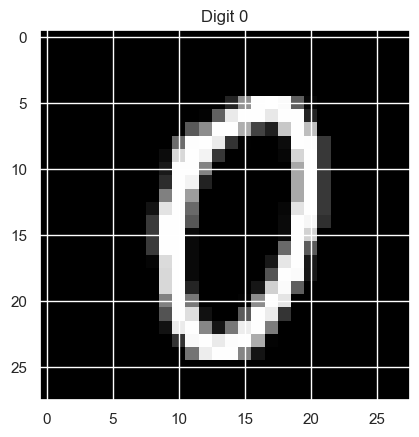

In [23]:
zero = train_data.iloc[1000, 1:]
zero.shape
zero = zero.values.reshape(28,28)
plt.imshow(zero, cmap='gray')
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 3')

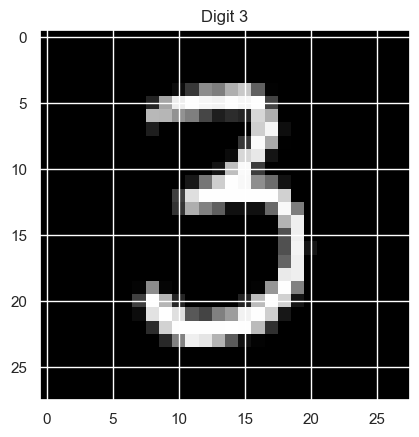

In [24]:
three = train_data.iloc[50, 1:]
three.shape
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

Text(0.5, 1.0, 'Digit 1')

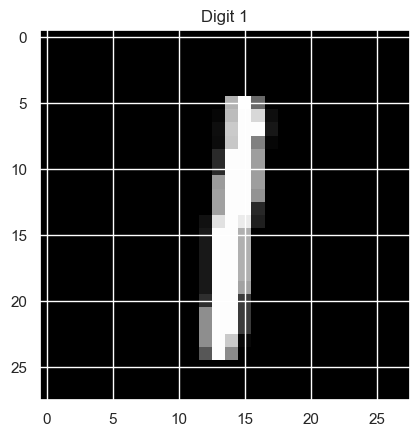

In [25]:
one = train_data.iloc[40, 1:]
one.shape
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 2')

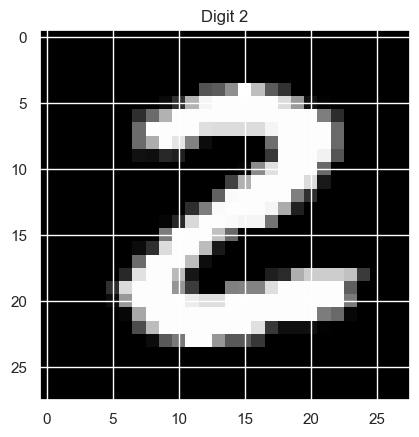

In [29]:
two = train_data.iloc[25, 1:]
two.shape
two = two.values.reshape(28,28)
plt.imshow(two, cmap='gray')
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 4')

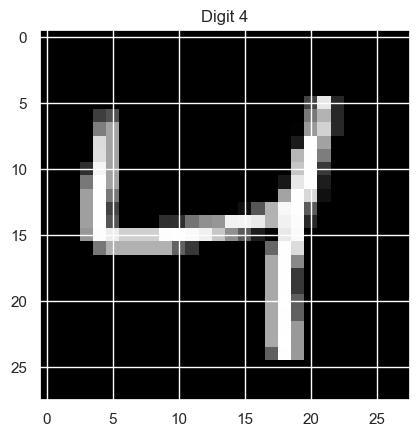

In [32]:
four = train_data.iloc[2, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 9')

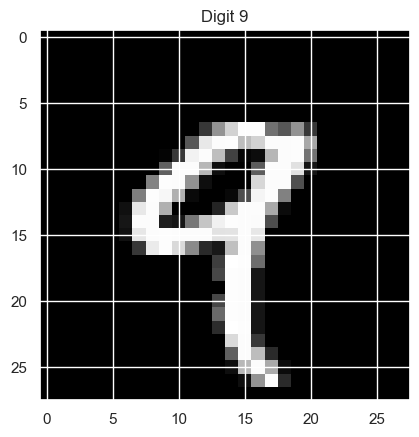

In [37]:
nine = train_data.iloc[4, 1:]
nine.shape
nine = nine.values.reshape(28,28)
plt.imshow(nine, cmap='gray')
plt.title("Digit 9")

Text(0.5, 1.0, 'Digit 7')

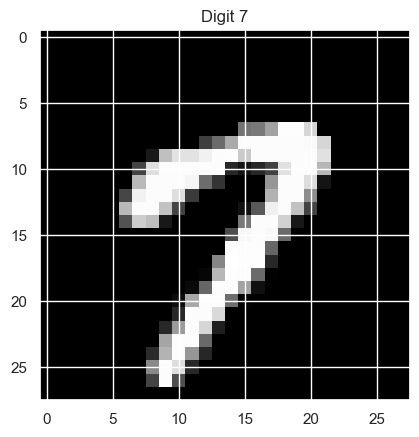

In [46]:
seven = train_data.iloc[15, 1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.axis('off')
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

Text(0.5, 1.0, 'Digit 6')

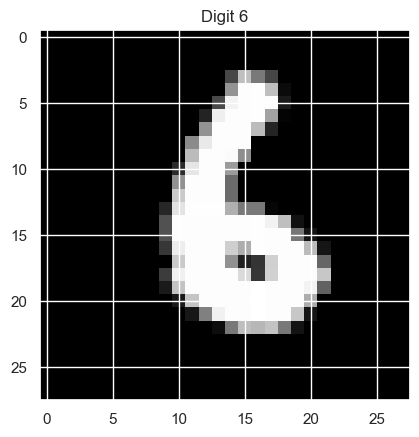

In [51]:
six = train_data.iloc[36, 1:]
six.shape
six = six.values.reshape(28,28)
plt.imshow(six, cmap='gray')
plt.title("Digit 6")

Text(0.5, 1.0, 'Digit 8')

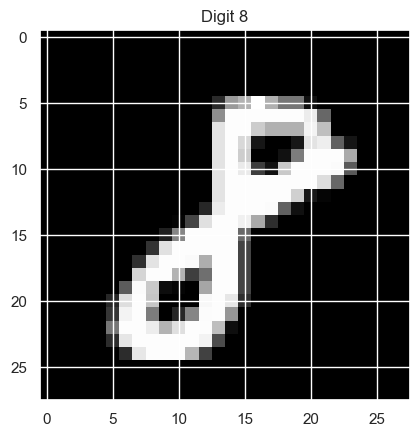

In [56]:
eight = train_data.iloc[31, 1:]
eight.shape
eight = eight.values.reshape(28,28)
plt.imshow(eight, cmap='gray')
plt.title("Digit 8")

<Axes: >

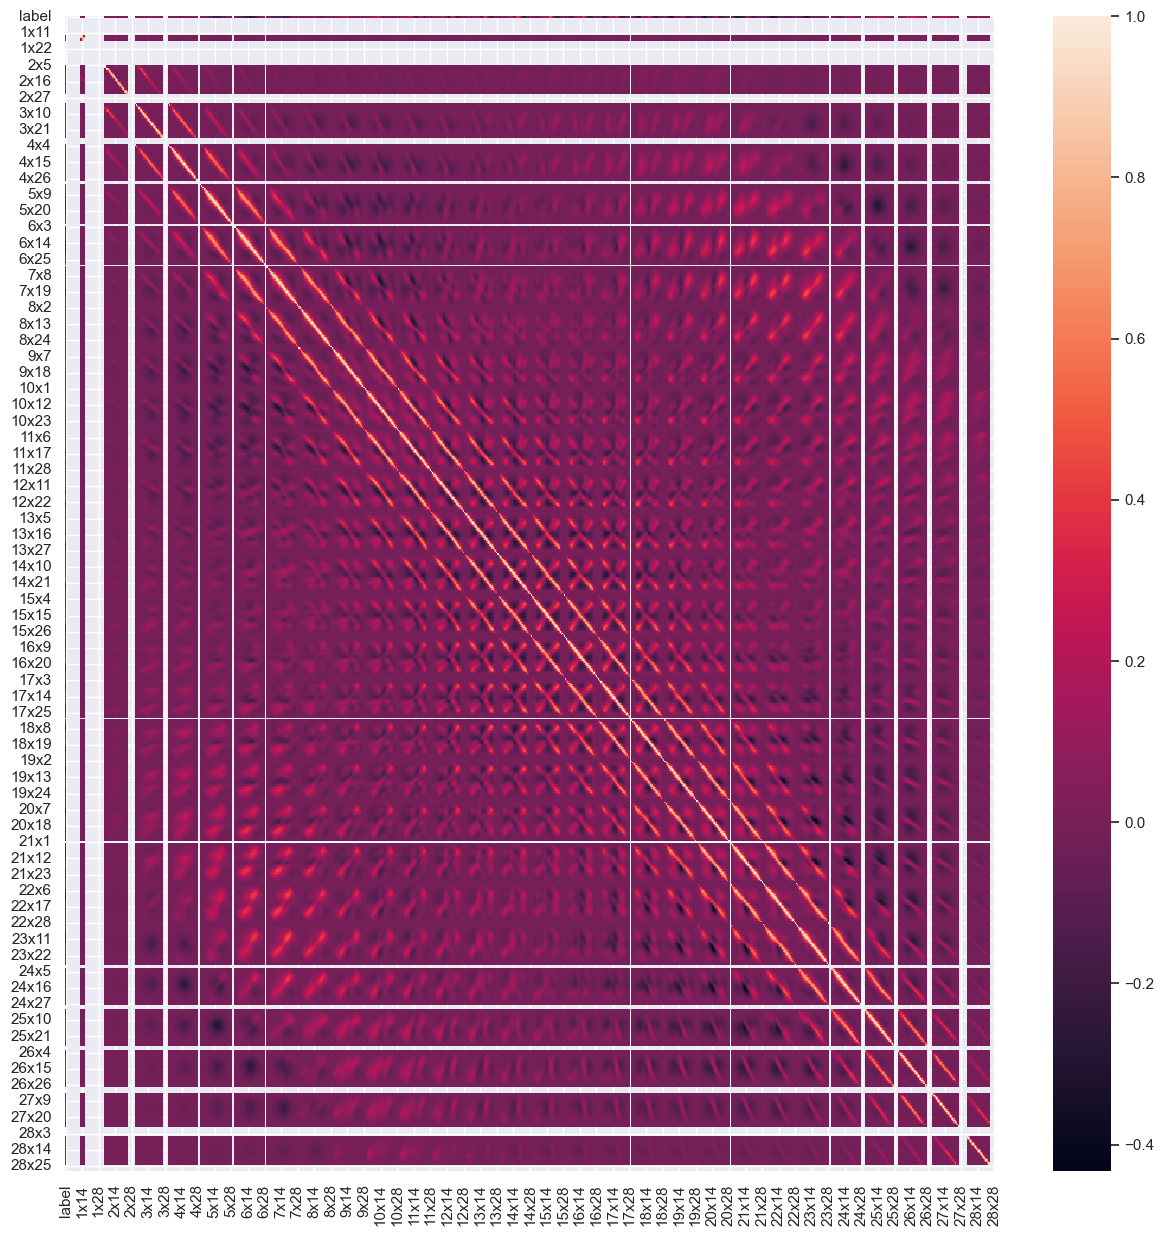

In [26]:
#Visualzing the correlation between different pixcels 
plt.figure(figsize=(15,15))
sns.heatmap(data=train_data.corr(),annot=False)

In [5]:
#  Calculating the average feature values
pd.set_option('display.max_rows', 50)
round(train_data.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

15x16    139.55
16x16    139.11
15x17    137.10
16x15    135.69
8x16     135.40
          ...  
9x1        0.00
10x1       0.00
13x1       0.00
14x1       0.00
28x28      0.00
Length: 784, dtype: float64

Since the average pixcelvalues range from 140 to 0 its better to preprocess them.

2. Data Preprocessing: Once you have the dataset, preprocess the data by dividing it into
training and testing sets. The training set will be used to train the model, and the testing
set will be used to evaluate its performance.


In [4]:
# splitting into X and y
X_train = train_data.drop("label", axis = 1)
y_train = train_data['label']

In [5]:
X_test = test_data.drop("label", axis = 1)
y_test = test_data['label']

In [6]:
#preprocessing the X_train and X_test 
#StandardScaler is that it will transform your data such that its distribution will have a mean value of 0 and a standard deviation of 1

scaler = StandardScaler()

# Fit and transform the training data to have mean=0 and std=1
X_train = scaler.fit_transform(X_train)
# Transform the test data using the scaling parameters learned from the training data
X_test = scaler.transform(X_test)


In [11]:
print(X_train[1:10,350:360])

[[-0.82034372 -0.91768349 -1.02909594 -1.058279   -0.96567404 -0.79447676
   2.0465914   2.62578927  2.56195635 -0.25540754]
 [-0.82034372 -0.91768349 -1.02909594 -1.058279    0.49955615  1.59312101
   1.65709097 -0.27351021 -0.35512441 -0.25540754]
 [ 1.06204837  1.36492012  1.25600629  0.07577362 -0.96567404 -0.79447676
  -0.61674936 -0.47007288 -0.35512441 -0.25540754]
 [-0.74688452 -0.21395589  1.20138233  1.21882664  0.19392531 -0.79447676
  -0.61674936 -0.47007288 -0.35512441 -0.25540754]
 [-0.82034372 -0.91768349 -1.02909594  0.35478656  1.29958982  1.57432103
   0.01487295 -0.47007288 -0.35512441 -0.25540754]
 [ 1.5028036   1.36492012 -0.0458647  -1.058279   -0.96567404 -0.79447676
  -0.61674936 -0.47007288 -0.35512441 -0.25540754]
 [ 0.01525472  0.99501203  1.21959032  1.20982623  1.29958982  1.57432103
   1.53076651 -0.35950638 -0.35512441 -0.25540754]
 [ 1.511986    0.37248377 -1.02909594 -1.058279   -0.96567404 -0.79447676
  -0.61674936 -0.47007288 -0.35512441 -0.25540754]


In [12]:
print(X_test[1:10,350:360])

[[ 6.28604328e-01 -8.22706421e-01 -1.04727288e+00 -1.07601741e+00
  -9.79675893e-01 -7.92706647e-01 -6.10763737e-01 -4.64282235e-01
  -3.54907482e-01 -2.56014147e-01]
 [ 4.54798281e-01  1.34573197e+00 -3.48110317e-01 -1.07601741e+00
  -9.79675893e-01 -7.92706647e-01 -6.10763737e-01 -4.64282235e-01
  -3.54907482e-01 -2.56014147e-01]
 [-8.25877849e-01 -9.30232292e-01 -1.04727288e+00 -1.07601741e+00
   2.96608103e-05  1.57881649e+00  2.05568709e+00  2.63853932e+00
   1.63967440e-01 -2.56014147e-01]
 [-8.25877849e-01 -9.30232292e-01 -1.04727288e+00 -7.89471289e-01
   1.10556896e+00  1.56936819e+00  8.48321320e-02 -4.64282235e-01
  -3.54907482e-01 -2.56014147e-01]
 [ 1.49763456e+00  1.34573197e+00  1.10469501e+00 -1.07601741e+00
  -9.79675893e-01 -7.92706647e-01 -6.10763737e-01 -4.64282235e-01
  -3.54907482e-01 -2.56014147e-01]
 [-1.85539784e-01  2.61512774e-01  7.41493680e-01  1.18948789e+00
   1.29431957e+00  8.04055944e-01 -6.10763737e-01 -4.64282235e-01
  -3.54907482e-01 -2.56014147e-01

3. Model Building: Next, build a Support Vector Machine (SVM) model using a suitable
library such as scikit-learn in Python. Choose appropriate hyperparameters for the SVM
model, such as the kernel function, regularization parameter, etc.

Here initally we are traing our dataset on three differnt models namely linear SVM and in non-linear SVM we are training it with poly and rbf models and checking which is the best one and performing  a grid search for hyperparameter tunning on that model.

In [69]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [70]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.928 

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  927    0    3    6    3   19]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


In [71]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.89      0.93      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.89      0.90       892
           6       0.96      0.93      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [79]:
# Saving the model
joblib.dump(model_linear, 'linear_svm.pkl')

['linear_svm.pkl']

In [72]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [73]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9611 

[[ 962    0    0    1    0    3    4    0   10    0]
 [   0 1122    3    0    2    1    4    0    3    0]
 [   6    0  977    4    2    0    2    6   35    0]
 [   0    0    0  972    0    4    2    5   21    6]
 [   0    0    2    0  952    0    7    2    5   14]
 [   2    1    2    4    2  862    7    1    9    2]
 [   4    3    1    0   10    7  920    0   13    0]
 [   1    9   11    2   13    0    0  956   10   26]
 [   1    0    3    7    4    7    2    2  944    4]
 [   3    4    1   12   27    3    0    3   12  944]]


In [74]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.94      0.97      0.95       982
           5       0.97      0.97      0.97       892
           6       0.97      0.96      0.97       958
           7       0.98      0.93      0.95      1028
           8       0.89      0.97      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [80]:
joblib.dump(non_linear_model_poly, 'nonlinear_poly_svm.pkl')

['nonlinear_poly_svm.pkl']

In [75]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [76]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9656 

[[ 967    0    2    1    0    3    3    2    2    0]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    3  980    1    7    0   12    7    0]
 [   0    0   13    0  945    2    3    7    2   10]
 [   2    0    2   11    1  857    6    5    6    2]
 [   6    2    0    0    4    8  927    6    5    0]
 [   1    6   13    3    3    0    0  989    0   13]
 [   3    0    6    5    6   10    3   12  926    3]
 [   4    5    6   11   13    2    0   21    3  944]]


In [77]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [81]:
joblib.dump(non_linear_model, 'nonlinear_rbf_svm.pkl')

['nonlinear_rbf_svm.pkl']

The accuracy of the three models are as below:<br>
Linear SVM : 92.8%<br>
Non-Linear Polynomial SVM : 96.11%<br>
Non-Linear RBF SVM : 96.56%<br><br>
So the best model is Non-Linear RBF SVM



Hyperparametertuning is done by taking small set of samples from the training dataset and best parameters are choosen among them

In [13]:
# Assuming X_train and y_train are your full training data
# Splitting your data into a smaller subset
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=10000, stratify=y_train, random_state=101)

folds = KFold(n_splits=5, shuffle=True, random_state=101)
hyper_params = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}]

svm_model = SVC(kernel="rbf")

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=hyper_params,
    scoring='accuracy',
    cv=folds,
    verbose=1,
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train_small, y_train_small)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.001}


In [14]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,438.995225,6.389577,55.115510,0.728034,1,0.01,"{'C': 1, 'gamma': 0.01}",0.7600,0.7505,0.7610,...,0.7582,0.009234,9,0.999500,0.999750,0.999750,0.999625,0.99975,0.999675,0.000100
1,105.908251,3.272910,39.224834,3.568500,1,0.001,"{'C': 1, 'gamma': 0.001}",0.9325,0.9340,0.9360,...,0.9358,0.002293,3,0.973875,0.975000,0.974500,0.974250,0.97475,0.974475,0.000391
2,134.550323,5.970870,46.719270,5.037489,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.9005,0.9035,0.9075,...,0.9064,0.003852,6,0.918750,0.921375,0.918875,0.917375,0.91775,0.918825,0.001398
3,442.852875,19.386286,67.450813,9.800646,10,0.01,"{'C': 10, 'gamma': 0.01}",0.7785,0.7700,0.7805,...,0.7760,0.007810,7,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,77.731848,15.998862,32.609515,6.917399,10,0.001,"{'C': 10, 'gamma': 0.001}",0.9450,0.9440,0.9465,...,0.9450,0.001140,1,0.998625,0.999000,0.998875,0.998500,0.99850,0.998700,0.000203
5,45.793289,3.405387,25.163488,1.195519,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.9245,0.9265,0.9305,...,0.9310,0.005273,5,0.962000,0.961625,0.962250,0.959875,0.96075,0.961300,0.000875
6,394.028515,13.885747,64.766707,12.434489,100,0.01,"{'C': 100, 'gamma': 0.01}",0.7785,0.7700,0.7805,...,0.7760,0.007810,7,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
7,80.419605,3.244782,34.683379,3.658098,100,0.001,"{'C': 100, 'gamma': 0.001}",0.9420,0.9420,0.9435,...,0.9434,0.001319,2,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
8,43.566086,4.084897,21.841868,2.836716,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.9275,0.9300,0.9265,...,0.9311,0.004042,4,0.993250,0.994875,0.993500,0.993250,0.99300,0.993575,0.000669


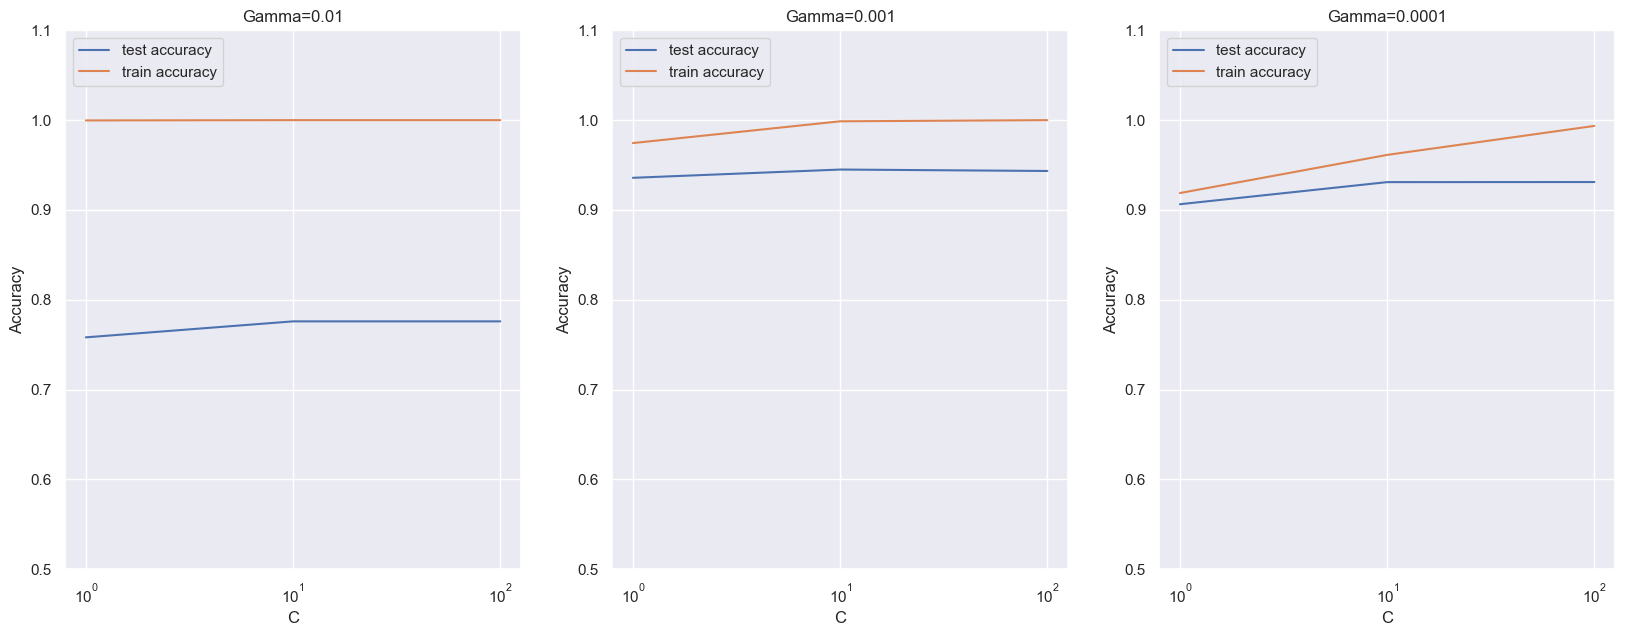

In [15]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [16]:
# printing the optimal accuracy score and hyperparameters
best_score = grid_search.best_score_
best_hyperparams = grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.945 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


4. Model Training: Train the SVM model on the training dataset.

In [13]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9724 

[[ 967    0    3    2    1    2    2    1    2    0]
 [   0 1128    3    0    0    1    2    1    0    0]
 [   6    3 1001    0    2    0    1   13    5    1]
 [   0    0    3  982    1    8    0    8    7    1]
 [   0    0    8    0  953    1    3    7    2    8]
 [   3    0    1    8    2  865    4    4    4    1]
 [   5    2    0    0    3    8  935    3    2    0]
 [   0    4   11    2    1    1    0 1000    0    9]
 [   3    2    5    5    4    8    2    8  931    6]
 [   1    5    4    8   12    3    0   12    2  962]] 



5. Model Evaluation: Evaluate the performance of the SVM model on the testing dataset
by calculating metrics such as accuracy, precision, recall, and F1-score.

In [14]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Final Model Accuracy : 97.24%

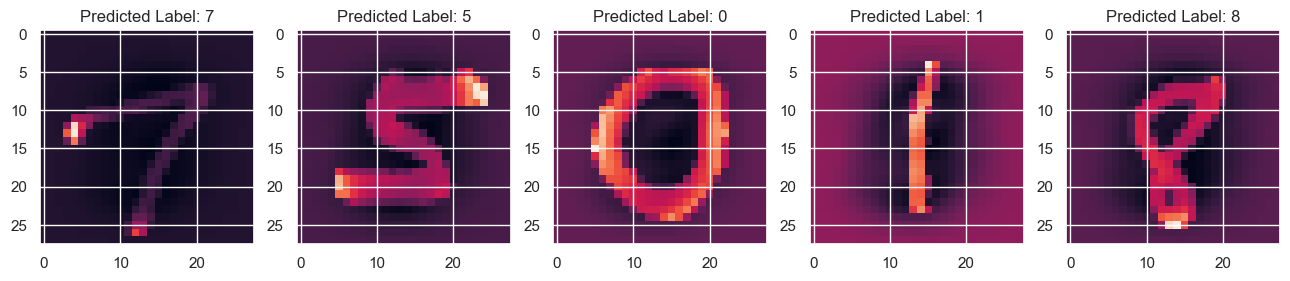

In [20]:
# Let us visualize our final model on unseen training dataset

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

In [16]:
#Saving the final model
joblib.dump(model, 'updated_rbf_svm.pkl')

['updated_rbf_svm.pkl']

7.User Interface: Build a simple user interface that allows users to draw a digit on the
screen, and then the SVM model predicts the digit based on the drawn image.

In [ ]:
import pygame , sys
from pygame.locals import *
import numpy as np
from keras.models import load_model 
import cv2

model = joblib.load('updated_rbf_svm.pkl')
WINDOWSIZEX = 640
WINDOWSIZEY = 480

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0 , 0)

IMAGESAVE = False

BOUNDRY = 5

LABELS ={0: "ZERO", 1: "ONE", 2: "TWO", 3: "THREE", 4: "FOUR", 5: "FIVE" , 6: "SIX", 7: "SEVEN", 8: "EIGHT", 9: "NINE"}

# initialize pygame
pygame.init()

FONT = pygame.font.SysFont("Arial", 20)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY)) # set up window size

pygame.display.set_caption("ANISH'S HANDWRITTEN DIGIT RECOGNIZER ") # set up window title

iswriting = False

number_xcord = []
number_ycord = []
image_cnt = 1

PREDICT = True
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
        
        if event.type == MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4,0)
            
            number_xcord.append(xcord)
            number_ycord.append(ycord)


        if event.type == MOUSEBUTTONDOWN:
            iswriting = True
        
        if event.type == MOUSEBUTTONUP:
            iswriting = False
            number_xcord = sorted(number_xcord)
            number_ycord = sorted(number_ycord)

            rect_min_x , rect_max_x = max(number_xcord[0] - BOUNDRY, 0), min(number_xcord[-1] + BOUNDRY, WINDOWSIZEX)
            rect_min_y , rect_max_y = max(number_ycord[0] - BOUNDRY, 0), min(number_ycord[-1] + BOUNDRY, WINDOWSIZEY)
            number_xcord = []
            number_ycord = []

            img_arr = np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x, rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite("image.png")
                image_cnt += 1
            
            if PREDICT:


                image = cv2.resize(img_arr, (28, 28))

                # Flatten the image to create a 1D array
                image = image.flatten()

                # Scale the flattened image using the same scaler used for training data
                image = scaler.transform([image])

                # Predict using the SVM model
                y_pred_img = model.predict(image)

                # image = cv2.resize(img_arr, (28, 28))
                # image = np.pad(image, (10,10), "constant", constant_values=0)
                # image = cv2.resize(image, (28, 28))/255

                label = str(LABELS[np.argmax(y_pred_img)])
                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left , textRecObj.bottom = rect_min_x, rect_min_y

                DISPLAYSURF.blit(textSurface, textRecObj)

            if event.type == KEYDOWN :
               if event.unicode == "n":
                    DISPLAYSURF.fill(BLACK)
        

        pygame.display.update()

Interface Outputs

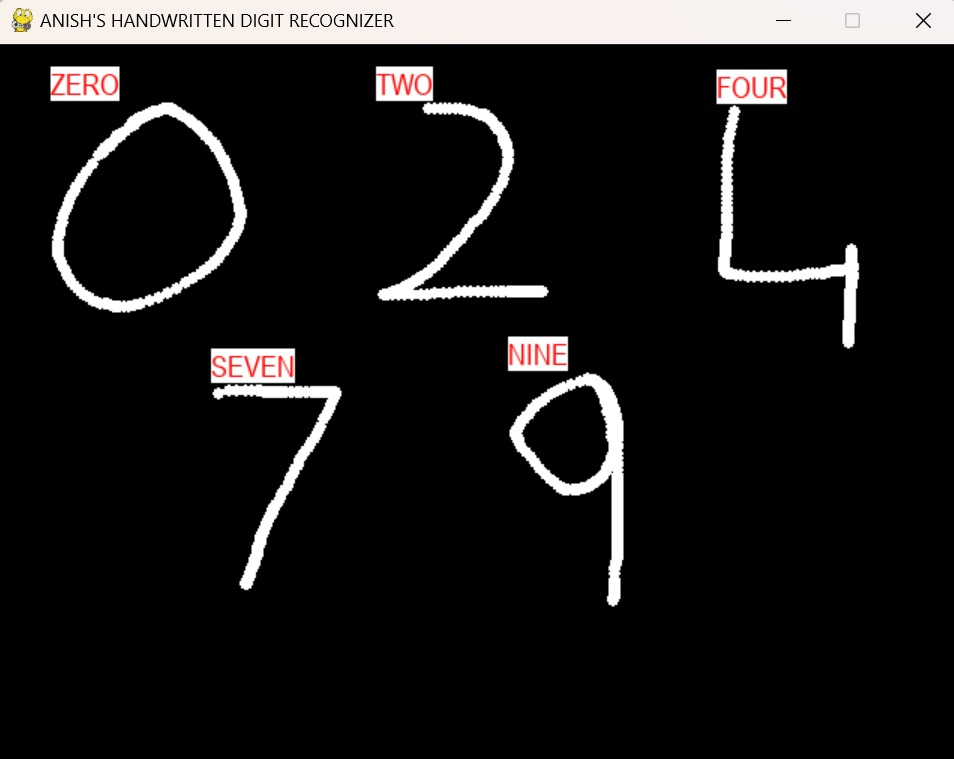

In [10]:
from IPython.display import Image

# Path to your image file
image_path = 'output.jpg'

# Display the image
Image(filename=image_path)
